In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

In [2]:
cumulative_vaccinations = [
    1959151,
    2080280,
    2254556,
    2494371,
    2769164,
    3090058,
    3365492,
    3520056,
    3687206,
    3985579,
    4303730,
    4661293,
    5085771,
    5727693,
    5962544,
    6221850,
    6473752,
    6816945,
    7253305,
    7792996,
    8082355,
    8362868,
    8663041,
    ]

daily_inoculations = [100000]

for i, x in enumerate(cumulative_vaccinations):
    if len(cumulative_vaccinations) > i+1:
        daily_inoculations.append(cumulative_vaccinations[i+1] - x)

dataframe = pd.DataFrame({'date': pd.date_range(start='1/12/2021', end='2/3/2021'), 'daily': daily_inoculations, 'cumulative': cumulative_vaccinations})
dataframe.set_index('date', inplace=True)

In [3]:
from datetime import datetime, timedelta

reg = LinearRegression()

x = np.array([x.timetuple().tm_yday for x in dataframe.index]).reshape(-1, 1)
y = dataframe['daily']

reg.fit(x, y)

LinearRegression()

In [4]:
import math
start = 11 + len(dataframe)
prediction_range = range(start, start + 45)
prediction_range_array = np.array(prediction_range).reshape(-1, 1)
projection = reg.predict(prediction_range_array)
projection = [x - (math.log(x) * 700 * i) for i, x in enumerate(projection, start=1)]
print(projection)

[393234.59918214974, 393844.8810694701, 394423.04236179154, 394970.1720597199, 395487.29485182406, 395975.37634405284, 396435.32775619935, 396868.0101500666, 397274.23824495095, 397654.7838684531, 398010.37908418034, 398341.71903244464, 398649.46451540117, 398934.2443540937, 399196.6575414645, 399437.2752124536, 399656.6424497779, 399855.2799418046, 400033.6855070251, 400192.33549799555, 400331.6860961697, 400452.1745077943, 400554.22006994206, 400638.2252747852, 400704.5767193725, 400753.6459874185, 400785.7904689558, 400801.3541231168, 400800.66818879015, 400784.05184744205, 400751.8128419761, 400704.2480551459, 400641.64405070344, 400564.2775801788, 400472.41605792224, 400366.3180068053, 400246.23347676935, 400112.4044382162, 399965.0651520673, 399804.44251816336]


In [5]:

prediction_dates = [(datetime(2021, 1, 1) + timedelta(x)) for x in prediction_range]
result_df = pd.DataFrame({'date': prediction_dates, 'daily': projection})
result_df.set_index('date', inplace=True)

In [6]:
last_known = dataframe['cumulative'][-1]
# print(last_known)
projection_cumulative = []
for x in projection:
    projection_cumulative.append(last_known + x)
    last_known = last_known + x
result_df['cumulative'] = projection_cumulative
print(result_df)

                    daily    cumulative
date                                   
2021-02-04  393234.599182  9.056276e+06
2021-02-05  393844.881069  9.450120e+06
2021-02-06  394423.042362  9.844544e+06
2021-02-07  394970.172060  1.023951e+07
2021-02-08  395487.294852  1.063500e+07
2021-02-09  395975.376344  1.103098e+07
2021-02-10  396435.327756  1.142741e+07
2021-02-11  396868.010150  1.182428e+07
2021-02-12  397274.238245  1.222155e+07
2021-02-13  397654.783868  1.261921e+07
2021-02-14  398010.379084  1.301722e+07
2021-02-15  398341.719032  1.341556e+07
2021-02-16  398649.464515  1.381421e+07
2021-02-17  398934.244354  1.421314e+07
2021-02-18  399196.657541  1.461234e+07
2021-02-19  399437.275212  1.501178e+07
2021-02-20  399656.642450  1.541144e+07
2021-02-21  399855.279942  1.581129e+07
2021-02-22  400033.685507  1.621132e+07
2021-02-23  400192.335498  1.661152e+07
2021-02-24  400331.686096  1.701185e+07
2021-02-25  400452.174508  1.741230e+07
2021-02-26  400554.220070  1.781285e+07


In [7]:
complete = pd.concat([dataframe, result_df])
print(complete)


                    daily    cumulative
date                                   
2021-01-12  100000.000000  1.959151e+06
2021-01-13  121129.000000  2.080280e+06
2021-01-14  174276.000000  2.254556e+06
2021-01-15  239815.000000  2.494371e+06
2021-01-16  274793.000000  2.769164e+06
...                   ...           ...
2021-03-11  400366.318007  2.302162e+07
2021-03-12  400246.233477  2.342187e+07
2021-03-13  400112.404438  2.382198e+07
2021-03-14  399965.065152  2.422195e+07
2021-03-15  399804.442518  2.462175e+07

[63 rows x 2 columns]


<Figure size 432x288 with 0 Axes>

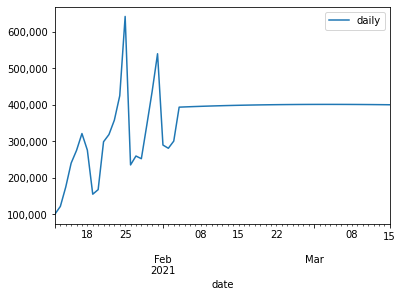

<Figure size 432x288 with 0 Axes>

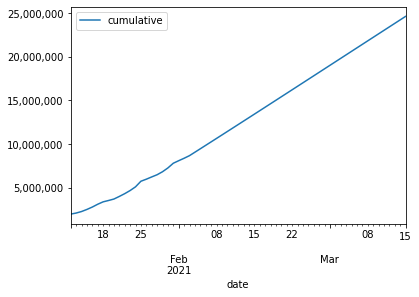

In [8]:
fig = plt.figure()
ax = complete.drop('cumulative', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

fig = plt.figure()
ax = complete.drop('daily', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

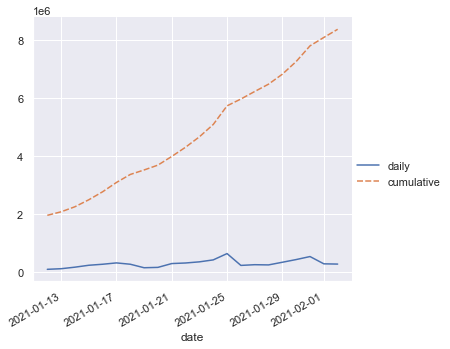

In [17]:
import seaborn as sns
sns.set_theme(style="darkgrid")
g = sns.relplot(kind="line", data=dataframe)
g.fig.autofmt_xdate()
